In [116]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics
import numpy as np
import numpy
import keras
dataset = read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results6_ClusteringSupervisedData\supervised_all1_7.xlsx')
#dataset = dataset.sample(frac=1, replace=False)
#dataset = dataset.reset_index(drop=True)
dataset

,CQImoyen(t-1),TraficDataDL(t-1),TraficDataUL(t-1),VoIPqualitymeasinsuffstat(t-1),CROZON_NombredeConnexionsPS(t-1),nbUEVoIPqualityOK(t-1),Nbrtentatives_QCi5__TEAVoix(t-1),Tec(t-1),CQImoyen(t),TraficDataDL(t),...,Nbrtentatives_QCi5__TEAVoix(t+5),Tec(t+5),CQImoyen(t+6),TraficDataDL(t+6),TraficDataUL(t+6),VoIPqualitymeasinsuffstat(t+6),CROZON_NombredeConnexionsPS(t+6),nbUEVoIPqualityOK(t+6),Nbrtentatives_QCi5__TEAVoix(t+6),Tec(t+6)
0,0.333333,0.272727,0.230769,0.368421,0.352941,0.948718,0.352941,D,0.375000,0.260870,...,0.333333,D,0.315789,0.250000,0.230769,0.512821,0.375000,0.842105,0.388889,D
1,0.375000,0.260870,0.272727,0.527778,0.352941,0.571429,0.315789,D,0.352941,0.240000,...,0.388889,D,0.400000,0.250000,0.260870,0.627451,0.428571,0.907692,0.388889,D
2,0.352941,0.240000,0.240000,0.444444,0.352941,0.804878,0.285714,D,0.315789,0.285714,...,0.388889,D,0.444444,0.275862,0.347826,0.555556,0.470588,1.000000,0.400000,D
3,0.315789,0.285714,0.250000,0.300000,0.333333,0.365854,0.272727,D,0.400000,0.259259,...,0.400000,D,0.500000,0.333333,0.363636,0.341463,0.444444,0.916667,0.400000,D
4,0.400000,0.259259,0.269231,0.782609,0.538462,1.000000,0.500000,D,0.375000,0.272727,...,0.400000,D,0.421053,0.434783,0.400000,0.446809,0.642857,1.000000,0.600000,D
5,0.375000,0.272727,0.260870,0.319149,0.375000,1.000000,0.285714,D,0.352941,0.206897,...,0.600000,D,0.500000,0.380952,0.320000,0.901961,0.666667,1.000000,0.500000,D
6,0.352941,0.206897,0.222222,0.489796,0.250000,0.962963,0.333333,D,0.315789,0.250000,...,0.500000,D,0.500000,0.333333,0.296296,0.485714,0.571429,0.707317,0.444444,D
7,0.315789,0.250000,0.230769,0.512821,0.375000,0.842105,0.388889,D,0.400000,0.250000,...,0.444444,D,0.416667,0.208333,0.208333,0.513514,0.357143,0.923077,0.227273,D
8,0.400000,0.250000,0.260870,0.627451,0.428571,0.907692,0.388889,D,0.444444,0.275862,...,0.227273,D,0.176471,0.125000,0.125000,0.437500,0.187500,0.682927,0.210526,D
9,0.444444,0.275862,0.347826,0.555556,0.470588,1.000000,0.400000,D,0.500000,0.333333,...,0.210526,D,0.200000,0.130435,0.130435,0.411765,0.187500,0.477273,0.166667,D


In [105]:
#Transform Data Set into Discrete inputs
discrete_dataset = DataFrame()
Sum = 0
for column in dataset.columns:
    Sum+=(len(dataset[column].unique()))
    print(str(len(dataset[column].unique()))+', partial sum = '+str(Sum))
    for value in dataset[column].unique():
        discrete_dataset[column + str(value)] = (dataset[column] == value)
print('SUM = '+str(Sum))          

51, partial sum = 51
65, partial sum = 116
63, partial sum = 179
52, partial sum = 231
36, partial sum = 267
47, partial sum = 314
60, partial sum = 374
3, partial sum = 377
46, partial sum = 423
67, partial sum = 490
68, partial sum = 558
51, partial sum = 609
46, partial sum = 655
41, partial sum = 696
52, partial sum = 748
3, partial sum = 751
46, partial sum = 797
67, partial sum = 864
66, partial sum = 930
53, partial sum = 983
52, partial sum = 1035
39, partial sum = 1074
51, partial sum = 1125
3, partial sum = 1128
44, partial sum = 1172
65, partial sum = 1237
56, partial sum = 1293
53, partial sum = 1346
41, partial sum = 1387
42, partial sum = 1429
50, partial sum = 1479
3, partial sum = 1482
47, partial sum = 1529
57, partial sum = 1586
47, partial sum = 1633
53, partial sum = 1686
46, partial sum = 1732
41, partial sum = 1773
39, partial sum = 1812
3, partial sum = 1815
56, partial sum = 1871
50, partial sum = 1921
44, partial sum = 1965
53, partial sum = 2018
46, partial su

1
2
3
4
5
6
7
8
Train on 5500 samples, validate on 250 samples
Epoch 1/50
 - 1s - loss: 1.9761 - mean_absolute_error: 0.4000 - categorical_accuracy: 0.6678 - val_loss: 1.4271 - val_mean_absolute_error: 0.3678 - val_categorical_accuracy: 0.3080
Epoch 2/50
 - 0s - loss: 1.9482 - mean_absolute_error: 0.3966 - categorical_accuracy: 0.6682 - val_loss: 1.4181 - val_mean_absolute_error: 0.3648 - val_categorical_accuracy: 0.3080
Epoch 3/50
 - 0s - loss: 1.9262 - mean_absolute_error: 0.3928 - categorical_accuracy: 0.6685 - val_loss: 1.3688 - val_mean_absolute_error: 0.3572 - val_categorical_accuracy: 0.3080
Epoch 4/50
 - 0s - loss: 1.9158 - mean_absolute_error: 0.3902 - categorical_accuracy: 0.6722 - val_loss: 1.3422 - val_mean_absolute_error: 0.3526 - val_categorical_accuracy: 0.3200
Epoch 5/50
 - 0s - loss: 1.9102 - mean_absolute_error: 0.3885 - categorical_accuracy: 0.6762 - val_loss: 1.3226 - val_mean_absolute_error: 0.3493 - val_categorical_accuracy: 0.3320
Epoch 6/50
 - 0s - loss: 1.9066 

Epoch 46/50
 - 0s - loss: 1.8564 - mean_absolute_error: 0.3757 - categorical_accuracy: 0.6949 - val_loss: 1.2604 - val_mean_absolute_error: 0.3356 - val_categorical_accuracy: 0.4360
Epoch 47/50
 - 0s - loss: 1.8553 - mean_absolute_error: 0.3754 - categorical_accuracy: 0.6953 - val_loss: 1.2587 - val_mean_absolute_error: 0.3352 - val_categorical_accuracy: 0.4360
Epoch 48/50
 - 0s - loss: 1.8543 - mean_absolute_error: 0.3752 - categorical_accuracy: 0.6960 - val_loss: 1.2581 - val_mean_absolute_error: 0.3350 - val_categorical_accuracy: 0.4400
Epoch 49/50
 - 0s - loss: 1.8534 - mean_absolute_error: 0.3750 - categorical_accuracy: 0.6965 - val_loss: 1.2574 - val_mean_absolute_error: 0.3348 - val_categorical_accuracy: 0.4360
Epoch 50/50
 - 0s - loss: 1.8522 - mean_absolute_error: 0.3748 - categorical_accuracy: 0.6973 - val_loss: 1.2591 - val_mean_absolute_error: 0.3351 - val_categorical_accuracy: 0.4360


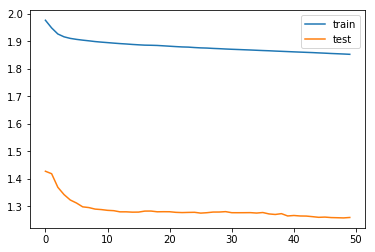

Test RMSE: 0.413


NameError: name 'results' is not defined

In [121]:
values = dataset.values
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


n_days_pred = 7
n_days = 1
n_features = 8
n_obs = n_days*n_features
n_train_samples = 5500

# integer encode direction
encoder = LabelEncoder()
encoder.fit(values[:,7])
for i in range(1,n_days+n_days_pred+1):
    print(i)
    values[:,8*i-1] = encoder.transform(values[:,8*i-1])
values = values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)
#change Prediction values into j Classes
j = 4
values2 = np.zeros((values.shape[0],values.shape[1]+j))
values2[:,:values.shape[1]] = values
for i in range(j):
    #values = np.hstack((values, np.array((values[:,n_obs] >=(i/j)) & (values[:,n_obs] <(i+1/j))).T),1)
    values2[:,n_obs+n_days_pred*n_features+i] = (values[:,n_obs] >=(i/j)) & (values[:,n_obs] <(i+1/j))
values = values2 
train = values[:n_train_samples, :]
test = values[n_train_samples:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, range(0,n_obs)], train[:,n_obs+n_days_pred*n_features:n_obs+n_days_pred*n_features+j]
test_X, test_y = test[:, range(0,n_obs)], test[:,n_obs+n_days_pred*n_features:n_obs+n_days_pred*n_features+j]

num_classes = j

#Split Values into Classification columns
#train_y = keras.utils.to_categorical(train_y,num_classes=num_classes)
#test_y = keras.utils.to_categorical(test_y,num_classes=num_classes)
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# design network
model = Sequential()
model.add(Dense(n_obs*8, activation='relu', input_dim =n_obs))
model.add(Dense(n_obs*4, activation='relu'))
model.add(Dense(j,activation ='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.mae, metrics.categorical_accuracy])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=36, validation_data=(test_X, test_y),verbose = 2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# make a prediction
yhat = model.predict(test_X)

rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

estimator = KerasClassifier(build_fn=model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(estimator, train_X, train_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))




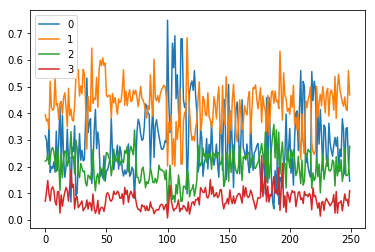

In [122]:
DataFrame(yhat).plot()

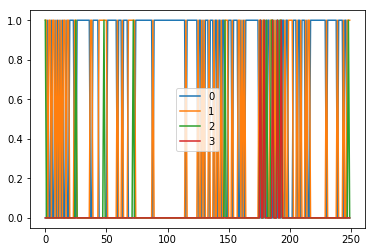

In [120]:
DataFrame(test_y).plot()

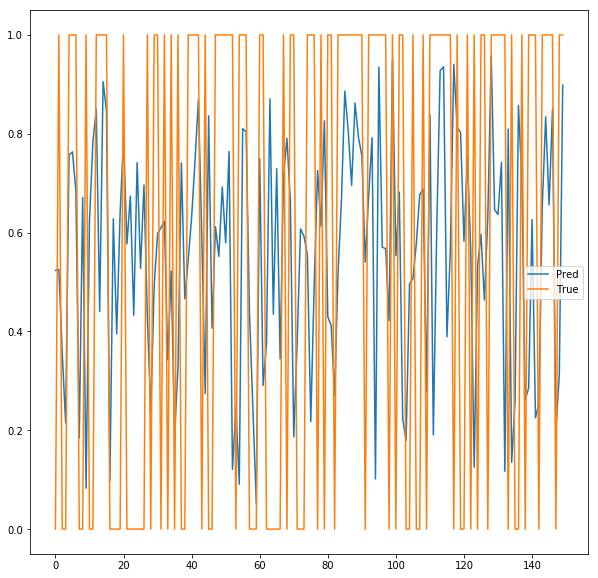

In [71]:
res = DataFrame()
res['Pred'] = DataFrame(yhat)[0]
res['True'] = DataFrame(test_y)[0]
res.plot(figsize = (10,10))

In [27]:
mask1 = [DataFrame(yhat)[0]>0.25]
numpy.sum(mask1)

88

In [28]:
mask2 = [DataFrame(test_y)[0]>0.25]
numpy.sum(mask2)

90

In [29]:
a = [mask1[i] == mask2[i] for i in range(0,len(mask1))]
numpy.sum(a)/len(test)

0.7692307692307693

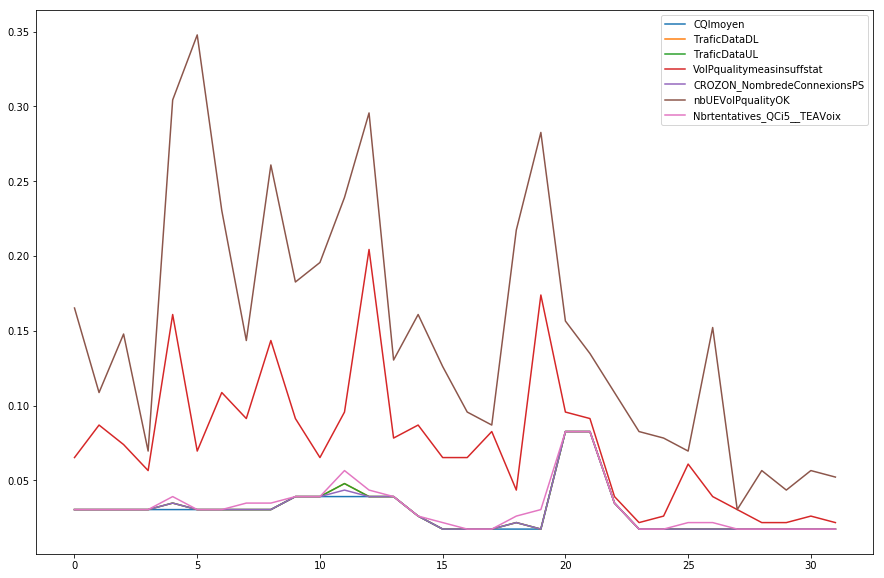

In [83]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results5_ClusteringTimeSeries\clustering_ts_all_D05551A.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

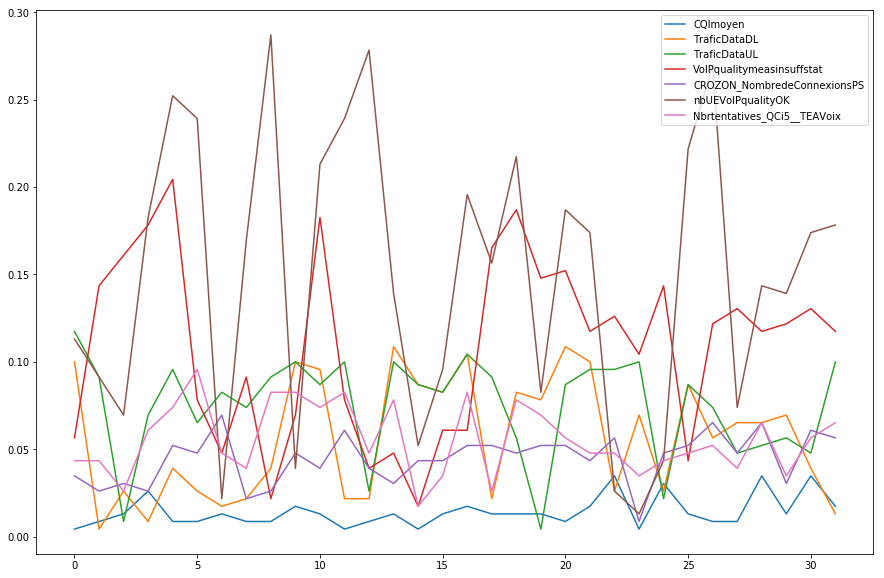

In [84]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results5_ClusteringTimeSeries\clustering_ts_all_D17502B.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

In [31]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(name+'(t-%d)' % (i)) for name in data.columns]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [name+'(t)' for name in data.columns]
		else:
			names += [(name+'(t+%d)' % (i)) for name in data.columns]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [32]:
example_values = series_to_supervised(cellKpi, n_in=2, n_out=1, dropnan=True).values


n_days_pred = 1
n_days = 2
n_features = 8
n_obs = n_days*n_features
n_train_samples = 600

# integer encode direction
encoder = LabelEncoder()
encoder.fit(example_values[:,7])
for i in range(1,n_days+n_days_pred+1):
    print(i)
    example_values[:,8*i-1] = encoder.transform(example_values[:,8*i-1])
example_values = example_values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
example_values = scaler.fit_transform(example_values)

1
2
3


In [33]:
example_values_X = example_values[:, range(0,n_obs)]
example_values_y = example_values[:, n_obs]

In [34]:
yhat = model.predict(example_values_X)

ValueError: Error when checking input: expected dense_19_input to have shape (112,) but got array with shape (16,)

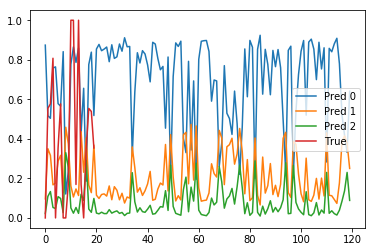

In [190]:
ex = DataFrame()
ex['Pred 0'] = DataFrame(yhat)[0]
ex['Pred 1'] = DataFrame(yhat)[1]
ex['Pred 2'] = DataFrame(yhat)[2]
ex['True'] = DataFrame(example_values_y)[0]
ex.plot()